# ============================================================
# Assignment: Perceptron & Activation Functions
# ============================================================
---

## Instructions:
- This assignment contains **two parts**.
- Fill in all code and explanation sections where indicated.
- Do NOT use high-level ML libraries like TensorFlow or PyTorch for implementation.
- You may use NumPy, Matplotlib, and scikit-learn for dataset generation and visualization.
---

## Part 1 — Perceptron from Scratch

### Q1. Dataset Preparation
1. Generate a **2D dataset** with 2 classes using `make_blobs` from scikit-learn.
2. Convert labels so that one class is `-1` and the other is `1`.
3. Visualize the dataset using a scatter plot.

**Your Task:**
- Write the code to generate and visualize the dataset.
- Provide the plot in your answer.


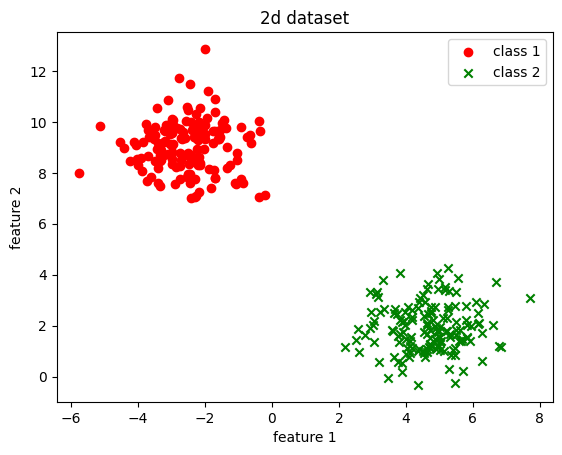

In [8]:
# Your code here to generate dataset and plot

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y=make_blobs(n_samples=300,n_features=2,centers=2,random_state=42)

y=np.where(y==0,-1,1)

plt.scatter(X[y==-1,0],X[y==-1,1],label='class 1',marker='o',color='red')
plt.scatter(X[y==1,0],X[y==1,1],marker='x',color='green',label='class 2')
plt.legend()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d dataset')
plt.show()



### Q2. Perceptron Implementation
1. Create a Python class `Perceptron` with:
   - `__init__` — initializes learning rate, number of epochs, and weights/bias.
   - `fit(X, y)` — trains the perceptron using the **Perceptron Learning Rule**.
   - `predict(X)` — returns predictions for given input features.
2. Use the update rule:  
$$
w \gets w + \eta (y_i - \hat{y}_i) x_i
$$
3. Train the Perceptron on your dataset.

**Your Task:**
- Implement and train the Perceptron.
- Display the final weights and bias.


In [22]:
# Your Perceptron class implementation here

class custom_preceptron:
    def __init__(self,learning_rate=0.01,epoch=100):
        self.lr=learning_rate
        self.ep=epoch
        self.w=None
        self.b=None
    def fit(self,X,y):
        X=np.array(X)
        n_samples,n_features=X.shape
        self.w=np.zeros(n_features)
        self.b=0

        for _ in range(self.ep):
            for i in range(n_samples):
                x_i=X[i]
                y_i=y[i]

                lin_out=np.dot(x_i,self.w) + self.b
                y_hat= 1 if lin_out >=0 else -1
                update=self.lr*(y_i-y_hat)
                self.w += update*x_i
                self.b += update
    def predict(self,X):
        X=np.array(X)
        lin_out=np.dot(X,self.w) + self.b
        return np.where(lin_out>=0,1,-1)

        

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
# Train your Perceptron and print weights, bias here

model =custom_preceptron()
model.fit(X_train,y_train)
print(model.w)
print(np.round(model.b,4))

[ 0.1097045  -0.06893235]
0.0


In [20]:
np.unique(y)

array([-1,  1])

### Q3. Decision Boundary
1. Write a function to plot the decision boundary of your trained perceptron.
2. Visualize the boundary along with the dataset.

**Your Task:**
- Provide the decision boundary plot.
- Explain in **2–3 sentences** how the perceptron separates the two classes.


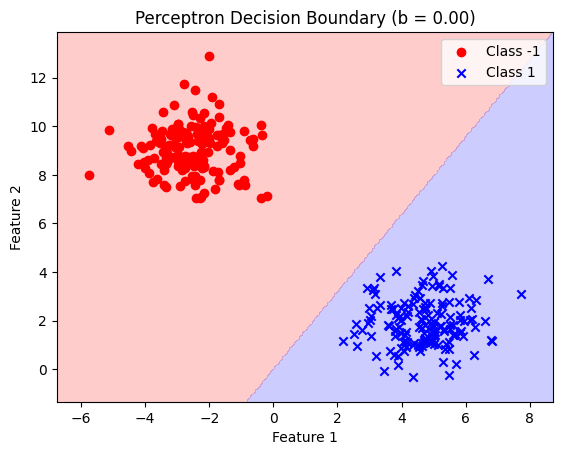

In [27]:
# Your decision boundary plotting code here
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2, levels=np.arange(-1, 2), colors=['red', 'blue'])
    
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='Class -1')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')
    
    plt.title(f'Perceptron Decision Boundary (b = {model.b:.2f})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
plot_decision_boundary(model, X, y)


**Explanation (2–3 sentences):**
 * the perceptron calculates weights and bias iteratively by selecting different batches of samples
 * the weight and bias separates it into two classes where data points having -ve values are assigned to class -1 and +ve values are assigned to class 1


## Part 2 — Activation Functions

### Q4. Activation Function Implementation
Implement the following activation functions and their derivatives:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Softmax

**Your Task:**
- For each activation function:
  - Write the forward pass formula.
  - Write the derivative formula.

**Table: Activation Function Formulas & Derivatives**


| Function       | Formula $f(x)$                                                     | Derivative $f'(x)$                                                                            |
| -------------- | ------------------------------------------------------------------ | --------------------------------------------------------------------------------------------- |
| **Sigmoid**    | $\sigma(x) = \frac{1}{1 + e^{-x}}$                                 | $\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$                                                |
| **Tanh**       | $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$                     | $1 - \tanh^2(x)$                                                                              |
| **ReLU**       | $\text{ReLU}(x) = \max(0, x)$                                      | $f'(x) = \begin{cases} 1 & x > 0 \\ 0 & x \le 0 \end{cases}$                                  |
| **Leaky ReLU** | $f(x) = \begin{cases} x & x > 0 \\ \alpha x & x \le 0 \end{cases}$ | $f'(x) = \begin{cases} 1 & x > 0 \\ \alpha & x \le 0 \end{cases}$                             |
| **Softmax**    | $\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$           | $\frac{\partial s_i}{\partial x_k} = s_i (\delta_{ik} - s_k)$ where $s$ is the softmax output |



In [28]:
# Your activation functions and derivatives here
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)


def softmax(x):
    
    exp_shifted = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_shifted / np.sum(exp_shifted, axis=-1, keepdims=True)

def softmax_derivative(s):
    
    s = s.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)


### Q5. Testing Activation Functions
1. Choose input values: `[-2, -1, 0, 1, 2]`.
2. Apply each activation function to these inputs.
3. Record the outputs in a table.

**Output Table:**
| Input |  Sigmoid |    Tanh   | ReLU | Leaky ReLU |  Softmax |
| ----: | :------: | :-------: | :--: | :--------: | :------: |
|    -2 | 0.119203 | -0.964028 |  0.0 |    -0.02   | 0.011656 |
|    -1 | 0.268941 | -0.761594 |  0.0 |    -0.01   | 0.031685 |
|     0 |    0.5   |    0.0    |  0.0 |     0.0    | 0.086129 |
|     1 | 0.731059 |  0.761594 |  1.0 |     1.0    | 0.234122 |
|     2 | 0.880797 |  0.964028 |  2.0 |     2.0    | 0.636409 |



In [31]:
# Your test code for activation functions here
inputs = np.array([-2, -1, 0, 1, 2])

sig_out = sigmoid(inputs)
tanh_out = tanh(inputs)
relu_out = relu(inputs)
leaky_out = leaky_relu(inputs, alpha=0.01)
soft_out = softmax(inputs)
print(f"{'Input':>6} | {'Sigmoid':>8} | {'Tanh':>8} | {'ReLU':>5} | {'Leaky ReLU':>10} | {'Softmax':>8}")
print("-" * 60)
for i in range(len(inputs)):
    print(f"{inputs[i]:6.2f} | {sig_out[i]:8.6f} | {tanh_out[i]:8.6f} | "
          f"{relu_out[i]:5.2f} | {leaky_out[i]:10.6f} | {soft_out[i]:8.6f}")

 Input |  Sigmoid |     Tanh |  ReLU | Leaky ReLU |  Softmax
------------------------------------------------------------
 -2.00 | 0.119203 | -0.964028 |  0.00 |  -0.020000 | 0.011656
 -1.00 | 0.268941 | -0.761594 |  0.00 |  -0.010000 | 0.031685
  0.00 | 0.500000 | 0.000000 |  0.00 |   0.000000 | 0.086129
  1.00 | 0.731059 | 0.761594 |  1.00 |   1.000000 | 0.234122
  2.00 | 0.880797 | 0.964028 |  2.00 |   2.000000 | 0.636409


### Q6. Visualization of Activation Functions
1. Plot each activation function for input range `[-5, 5]`.
2. Compare their shapes visually.

**Your Task:**
- Provide the plots for all activation functions.
- In **3–4 sentences**, explain how the choice of activation function can affect learning in a neural network.


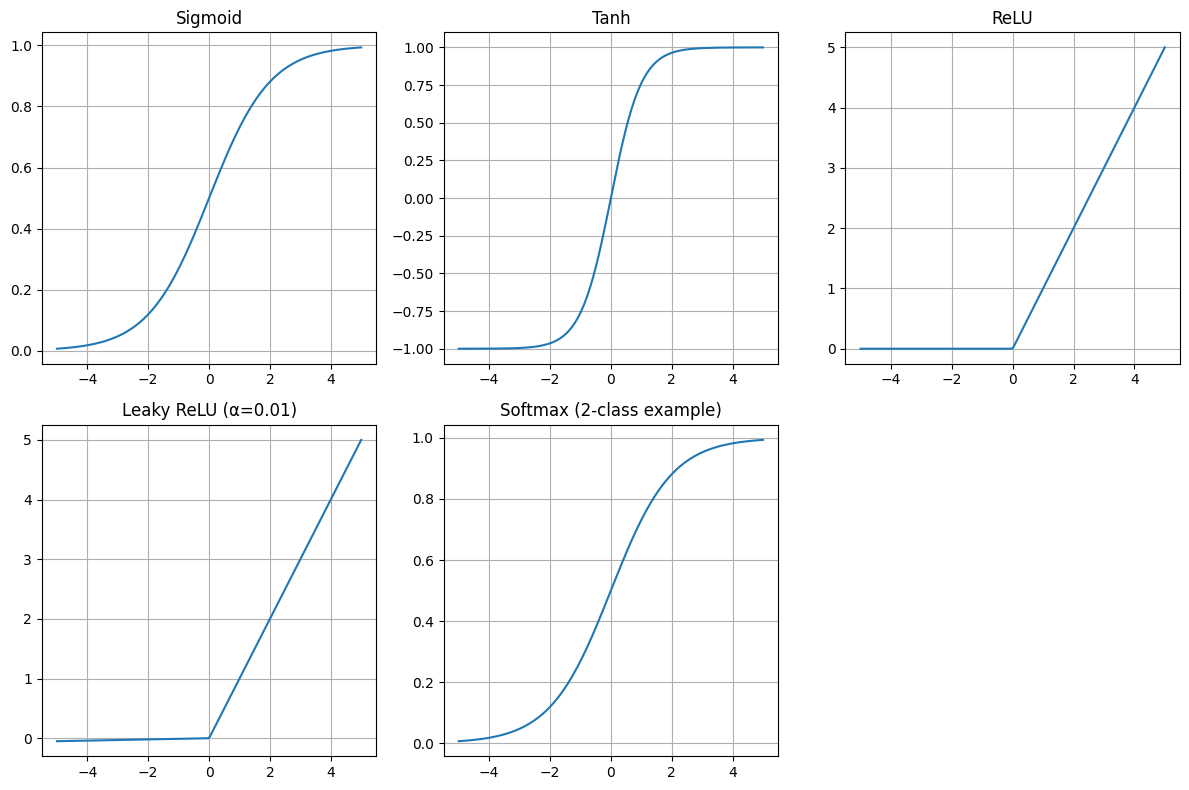

In [33]:
# Your plotting code for activation functions here
import numpy as np
import matplotlib.pyplot as plt




x = np.linspace(-5, 5, 200)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, tanh(x))
plt.title("Tanh")
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, relu(x))
plt.title("ReLU")
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, leaky_relu(x, alpha=0.01))
plt.title("Leaky ReLU (α=0.01)")
plt.grid(True)

plt.subplot(2, 3, 5)
soft_outputs = [softmax(np.array([v, 0]))[0] for v in x]
plt.plot(x, soft_outputs)
plt.title("Softmax (2-class example)")
plt.grid(True)

plt.tight_layout()
plt.show()


**Explanation (3–4 sentences):**

